# Курсовая работа по дисциплине "Технологии анализа данных и машинное обучение"

### Автор: Петрова Екатерина Андреевна.
### Группа: ПИ19-4.
### Тема: 3. Сравнение методов классификации на реальных наборах данных.  

#### Импортирую все необходимые модули

In [139]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn import metrics
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

#### Считываю датасет, который я буду использовать в курсовой работе

In [140]:
df = pd.read_csv("mydata.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


#### Сокращаю размер датасета до 10000 значений

In [141]:
df = pd.read_csv("mydata.csv")[:100000]
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,No,31.09,Yes,No,No,30.0,15.0,No,Female,45-49,White,No,Yes,Very good,6.0,No,No,No
99996,No,29.53,No,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Very good,7.0,No,No,No
99997,No,38.65,No,No,No,0.0,0.0,No,Male,25-29,White,No,No,Excellent,7.0,No,No,No
99998,No,50.84,Yes,No,Yes,30.0,0.0,Yes,Female,50-54,White,No,No,Poor,4.0,No,No,No


#### Удаляю ненужные колонки

In [142]:
df = df.drop(columns=['SkinCancer', 'KidneyDisease', 'Asthma', 'GenHealth', 'Race','DiffWalking','Stroke'])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
0,No,16.60,Yes,No,3.0,30.0,Female,55-59,Yes,Yes,5.0
1,No,20.34,No,No,0.0,0.0,Female,80 or older,No,Yes,7.0
2,No,26.58,Yes,No,20.0,30.0,Male,65-69,Yes,Yes,8.0
3,No,24.21,No,No,0.0,0.0,Female,75-79,No,No,6.0
4,No,23.71,No,No,28.0,0.0,Female,40-44,No,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,No,31.09,Yes,No,30.0,15.0,Female,45-49,No,Yes,6.0
99996,No,29.53,No,No,0.0,0.0,Male,35-39,No,Yes,7.0
99997,No,38.65,No,No,0.0,0.0,Male,25-29,No,No,7.0
99998,No,50.84,Yes,No,30.0,0.0,Female,50-54,No,No,4.0


#### Проверяю наличие пустых значений

In [143]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
PhysicalHealth      0
MentalHealth        0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
SleepTime           0
dtype: int64

In [144]:
if sum(df.isnull().sum()) == 0:
    print("NAN в заданном датасете отсутствуют!")
else: 
    print("Внимание! NAN в заданном датасете присутствуют!")

NAN в заданном датасете отсутствуют!


#### Вывожу информацию о датасете

In [145]:
df.info

<bound method DataFrame.info of       HeartDisease    BMI Smoking AlcoholDrinking  PhysicalHealth  \
0               No  16.60     Yes              No             3.0   
1               No  20.34      No              No             0.0   
2               No  26.58     Yes              No            20.0   
3               No  24.21      No              No             0.0   
4               No  23.71      No              No            28.0   
...            ...    ...     ...             ...             ...   
99995           No  31.09     Yes              No            30.0   
99996           No  29.53      No              No             0.0   
99997           No  38.65      No              No             0.0   
99998           No  50.84     Yes              No            30.0   
99999          Yes  24.02     Yes              No            25.0   

       MentalHealth     Sex  AgeCategory Diabetic PhysicalActivity  SleepTime  
0              30.0  Female        55-59      Yes          

In [146]:
df.describe() #Описательная статистика

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,28.220325,3.45355,3.906160,7.099690
std,6.376532,8.02923,7.951984,1.475423
min,12.020000,0.00000,0.000000,1.000000
25%,23.780000,0.00000,0.000000,6.000000
50%,27.260000,0.00000,0.000000,7.000000
75%,31.320000,2.00000,3.000000,8.000000
max,87.050000,30.00000,30.000000,24.000000


In [147]:
df.corr() #Коррелляция

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.111840,0.061016,-0.047444
PhysicalHealth,0.111840,1.000000,0.286135,-0.052096
MentalHealth,0.061016,0.286135,1.000000,-0.117564
SleepTime,-0.047444,-0.052096,-0.117564,1.000000


In [148]:
df.shape #Размерность обучающего датасета

(100000, 11)

In [149]:
df.nunique()

HeartDisease           2
BMI                 2812
Smoking                2
AlcoholDrinking        2
PhysicalHealth        31
MentalHealth          31
Sex                    2
AgeCategory           13
Diabetic               4
PhysicalActivity       2
SleepTime             23
dtype: int64

#### Заменяю значения признаков на числовые

In [150]:
df = df.replace({'HeartDisease' : {"No" : 0, "Yes" : 1}, 
                 'Smoking' : {"No" : 0, "Yes" : 1}, 
                 'AlcoholDrinking' : {"No" : 0, "Yes" : 1},
                 'Smoking' : {"No" : 0, "Yes" : 1},
                 'Sex' : {"Female" : 0, "Male" : 1},
                 'Diabetic' : {"No" : 0, "Yes" : 1, "Yes (during pregnancy)" : 2, 'No, borderline diabetes': 3},
                 'AgeCategory' : {"18-24" : 0, "25-29" : 1,"30-34" : 2, "35-39" : 3, "40-44" : 4, "45-49" : 5, "50-54" : 6, "55-59" : 7, "60-64" : 8, "65-69" : 9, "70-74" : 10, "75-79" : 11, "80 or older" : 12},
                 'PhysicalActivity' : {"No" : 0, "Yes" : 1}
                })
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
0,0,16.60,1,0,3.0,30.0,0,7,1,1,5.0
1,0,20.34,0,0,0.0,0.0,0,12,0,1,7.0
2,0,26.58,1,0,20.0,30.0,1,9,1,1,8.0
3,0,24.21,0,0,0.0,0.0,0,11,0,0,6.0
4,0,23.71,0,0,28.0,0.0,0,4,0,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0,31.09,1,0,30.0,15.0,0,5,0,1,6.0
99996,0,29.53,0,0,0.0,0.0,1,3,0,1,7.0
99997,0,38.65,0,0,0.0,0.0,1,1,0,0,7.0
99998,0,50.84,1,0,30.0,0.0,0,6,0,0,4.0


#### Так как в этом датасете анамально много значений 0 в признаках **PhysicalHealth** и **MentalHealth**, то заменю это значение на другие значения из этого признака, чтоб распределение было более нормальным

In [151]:
df[:20000] = df[:20000].replace({'PhysicalHealth' : {0 : 5}})
df[:40000] = df[:40000].replace({'PhysicalHealth' : {0 : 10}})
df[:60000] = df[:60000].replace({'PhysicalHealth' : {0 : 15}})
df[:80000] = df[:80000].replace({'PhysicalHealth' : {0 : 20}})
df[:100000] = df[:100000].replace({'PhysicalHealth' : {0 : 25}})

df[:20000] = df[:20000].replace({'MentalHealth' : {0 : 5}})
df[:40000] = df[:40000].replace({'MentalHealth' : {0 : 10}})
df[:60000] = df[:60000].replace({'MentalHealth' : {0 : 15}})
df[:80000] = df[:80000].replace({'MentalHealth' : {0 : 20}})
df[:100000] = df[:100000].replace({'MentalHealth' : {0 : 25}})

#### Выделяю целевую переменную и факторы
#### Затем разделяю данные на обучающую и тестовую выборки, создаю специальные функции

In [152]:
Y = df['HeartDisease']
X = df.drop(['HeartDisease'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

In [153]:
X

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
0,16.60,1,0,3.0,30.0,0,7,1,1,5.0
1,20.34,0,0,5.0,5.0,0,12,0,1,7.0
2,26.58,1,0,20.0,30.0,1,9,1,1,8.0
3,24.21,0,0,5.0,5.0,0,11,0,0,6.0
4,23.71,0,0,28.0,5.0,0,4,0,1,8.0
...,...,...,...,...,...,...,...,...,...,...
99995,31.09,1,0,30.0,15.0,0,5,0,1,6.0
99996,29.53,0,0,25.0,25.0,1,3,0,1,7.0
99997,38.65,0,0,25.0,25.0,1,1,0,0,7.0
99998,50.84,1,0,30.0,25.0,0,6,0,0,4.0


In [154]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    1
Name: HeartDisease, Length: 100000, dtype: int64

#### Размерности обучающей и тестовой выборки:

In [155]:
x_train.shape, y_train.shape

((80000, 10), (80000,))

In [156]:
x_test.shape, y_test.shape

((20000, 10), (20000,))

#### Функция для отображения матрицы ошибок

In [157]:
def ConfusionMatrix(y_pred):
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap="YlGnBu")

    ax.set_title('Матрица ошибок\n', fontsize = 30)
    
    ax.set_xlabel('\nПредсказанные значения', fontsize = 20)
    
    ax.set_ylabel('Реальные значения', fontsize = 20)
    
    ax.xaxis.set_ticklabels([0,1,2,3])
    
    ax.yaxis.set_ticklabels([0,1,2,3])

#### Функция для отображения метрик: 

In [158]:
def Metrics(y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')

#### Построение эмпирического распределения каждого существенного признака;

    Ось x - значения

    Ось y - частота повторов значений

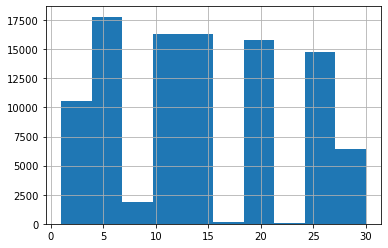

In [159]:
h = df["PhysicalHealth"].hist()
fig = h.get_figure()

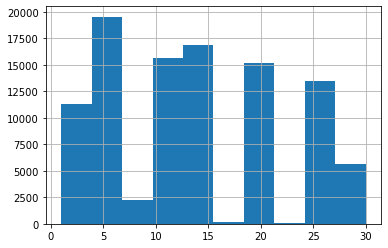

In [160]:
h = df["MentalHealth"].hist()
fig = h.get_figure()

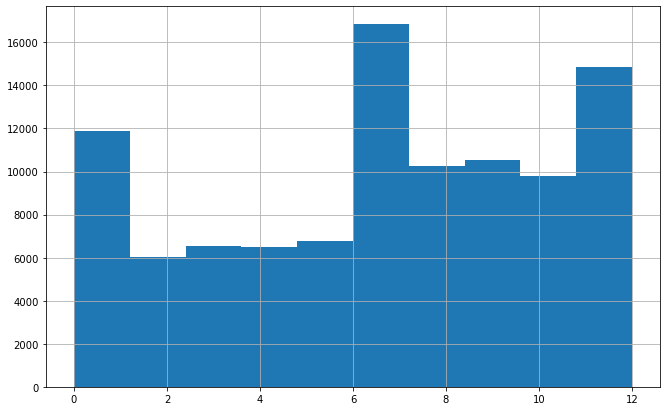

In [161]:
fig = plt.figure(figsize = (11,7))
ax = fig.gca()
df['AgeCategory'].hist(ax = ax);

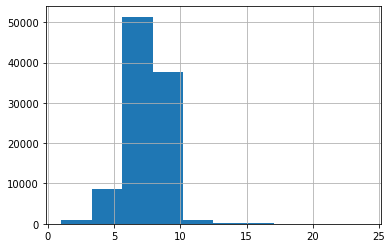

In [162]:
h = df["SleepTime"].hist()
fig = h.get_figure()

#### Распределение целевого признака

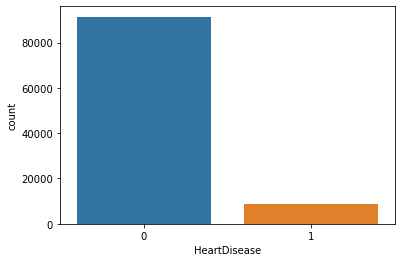

In [163]:
sns.countplot(x=df["HeartDisease"])

#### Построение совместного распределения каждого признака и целевой переменной

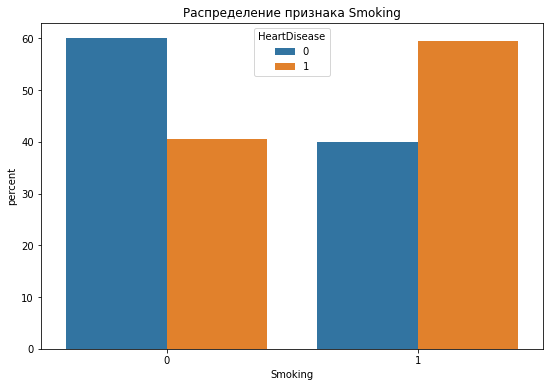

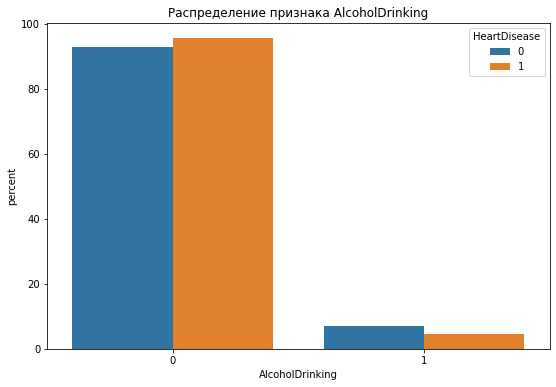

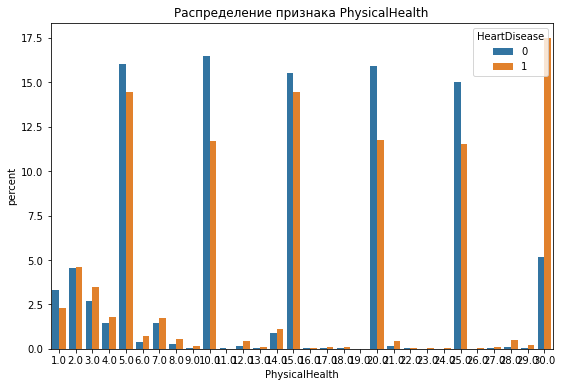

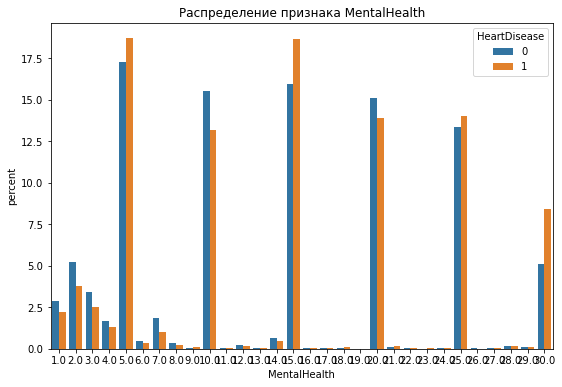

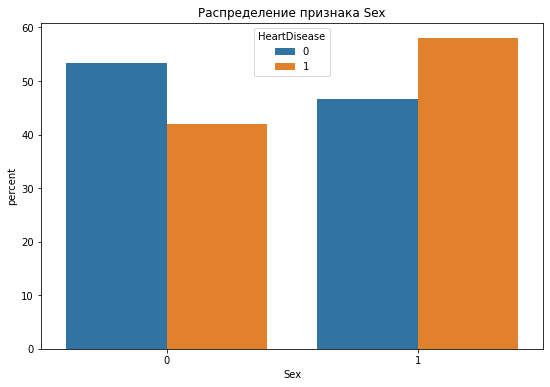

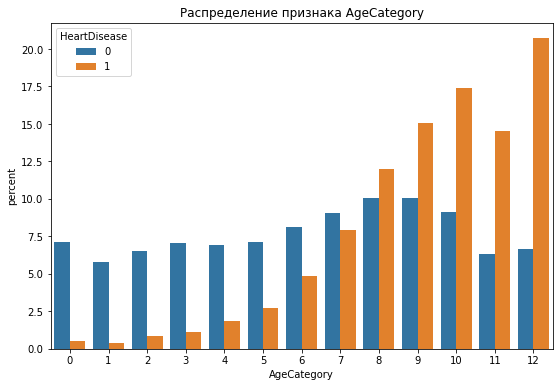

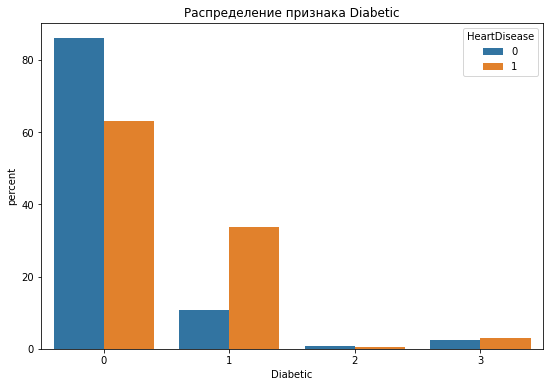

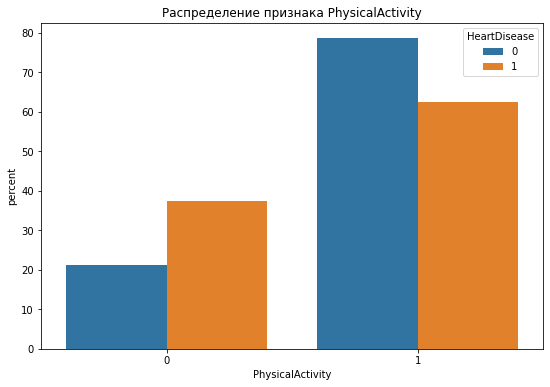

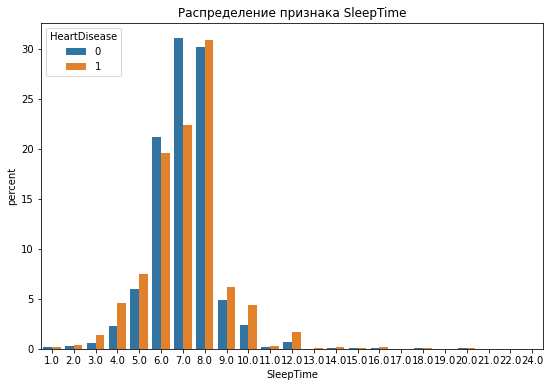

In [164]:
for col in df.columns[2:]:
    plt.figure(figsize=(9, 6))
    prop_df = df[col].groupby(df["HeartDisease"]).value_counts(normalize=True).rename("percent").reset_index()
    prop_df["percent"] *= 100
    sns.barplot(x=col, y="percent", hue="HeartDisease", data=prop_df)
    plt.title(f"Распределение признака {col}")

#### Построение корреляционной матрицы.

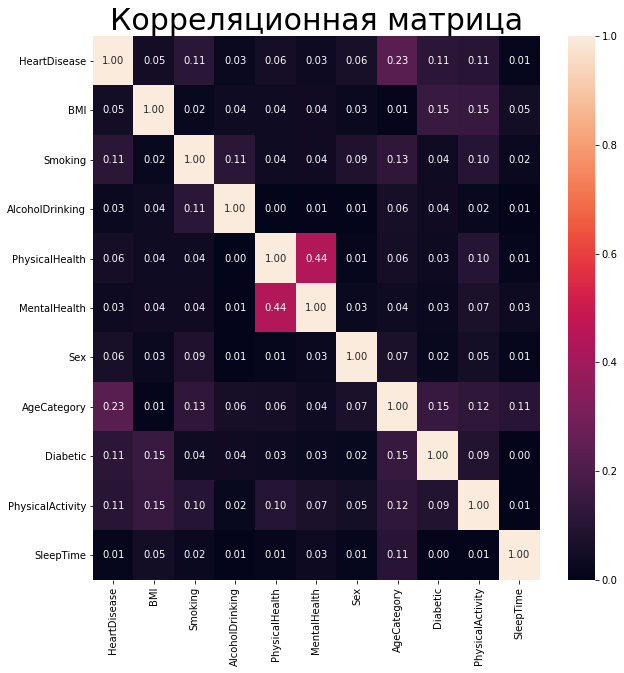

In [165]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f")
plt.title('Корреляционная матрица', fontsize=30)
plt.show()

## Начнем строить модели
# Логистическая регрессия

In [166]:
%%time 
logreg_model = LogisticRegression(max_iter=300)
logreg_model.fit(x_train, y_train)
logreg_prediction = logreg_model.predict(x_test)
Metrics(logreg_prediction)

Accuracy: 0.91225
Precision: 0.40816326530612246
Recall: 0.011454753722794959
F1: 0.02228412256267409
Wall time: 1.26 s


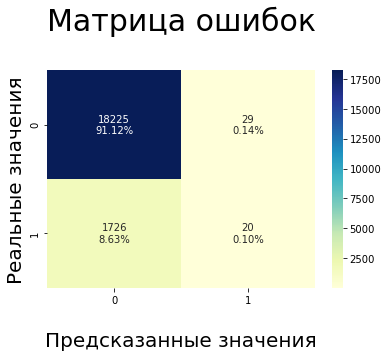

In [167]:
ConfusionMatrix(logreg_prediction)

# Метод опорных векторов (SVC)

In [168]:
%%time 
SVC_model = SVC()
SVC_model.fit(x_train, y_train)
y_pred_SVC_prediction = SVC_model.predict(x_test)
Metrics(y_pred_SVC_prediction)

Accuracy: 0.9127
Precision: 0.0
Recall: 0.0
F1: 0.0
Wall time: 1min 13s


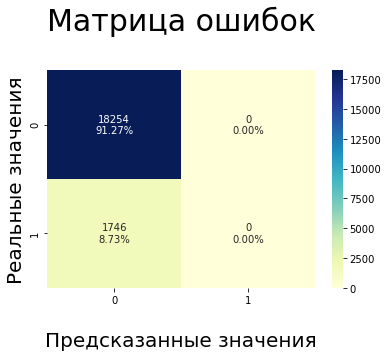

In [169]:
ConfusionMatrix(y_pred_SVC_prediction)

# Модель RidgeClassifier

In [185]:
%%time
ridge_model = RidgeClassifier(class_weight = 'balanced')
ridge_model.fit(x_train, y_train)
ridge_prediction = ridge_model.predict(x_test)
Metrics(ridge_prediction)

Accuracy: 0.67345
Precision: 0.18265021886191804
Recall: 0.788659793814433
F1: 0.29660743134087236
Wall time: 85.8 ms


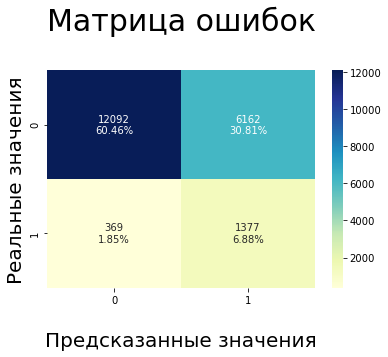

In [171]:
ConfusionMatrix(ridge_prediction)

# Метод k ближайших соседей (KNeighborsClassifier)

In [172]:
%%time 
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)
y_pred_KNN_prediction = KNN_model.predict(x_test)
Metrics(y_pred_KNN_prediction)

Accuracy: 0.9039
Precision: 0.3009049773755656
Recall: 0.07617411225658649
F1: 0.12157221206581353
Wall time: 2.09 s


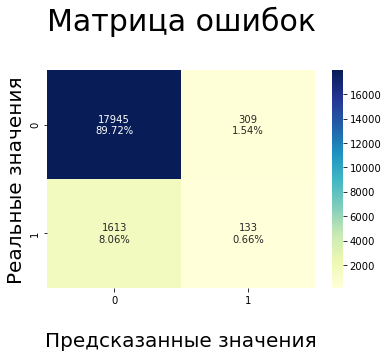

In [173]:
ConfusionMatrix(y_pred_KNN_prediction)

# Многослойный перцептрон (MLP)

In [186]:
%%time
MLP_model = MLPClassifier()
MLP_model.fit(x_train, y_train)
MLP_prediction = MLP_model.predict(x_test)
Metrics(MLP_prediction)

Accuracy: 0.912
Precision: 0.43
Recall: 0.024627720504009163
F1: 0.0465872156013001
Wall time: 39.6 s


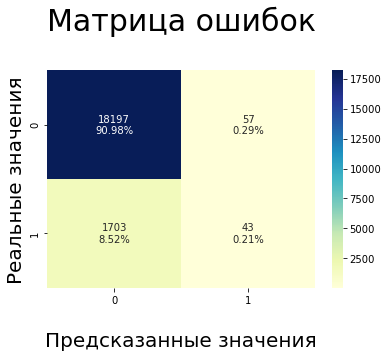

In [187]:
ConfusionMatrix(MLP_prediction)

# Дерево решений

In [176]:
%%time 
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred_tree_prediction = tree_model.predict(x_test)
Metrics(y_pred_tree_prediction)

Accuracy: 0.85355
Precision: 0.18216012896292316
Recall: 0.19415807560137457
F1: 0.1879678403105073
Wall time: 471 ms


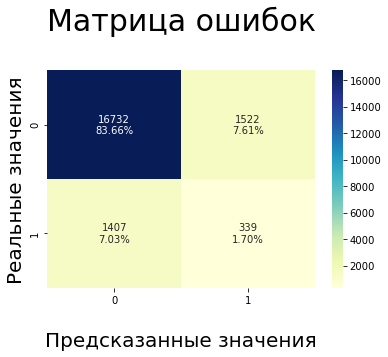

In [177]:
ConfusionMatrix(y_pred_tree_prediction)

# Случайный лес

In [178]:
%%time
forest_model = RandomForestClassifier()  
forest_model.fit(x_train, y_train)
forest_prediction = forest_model.predict(x_test)
Metrics(forest_prediction)

Accuracy: 0.89975
Precision: 0.2570356472795497
Recall: 0.07846506300114547
F1: 0.12022817025010968
Wall time: 7.35 s


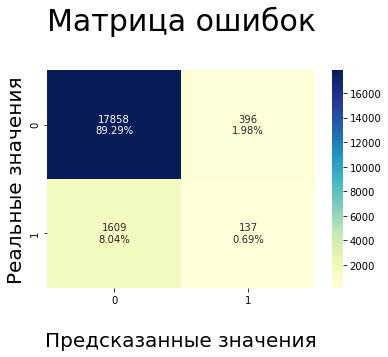

In [179]:
ConfusionMatrix(forest_prediction)

## Опираясь на данные результаты, можно сделать следующие выводы:
#### Лучшая модель по метрике Accurancy : 
* Метод опорных векторов (SVC) - Accuracy: 0.9127
#### Лучшая модель по метрике Precision: 
* Логистическая регрессия - Precision: 0.40816326530612246
#### Лучшая модель по метрике Recall: 
* Модель RidgeClassifier - Recall: 0.788659793814433
#### Лучшая модель по метрике F1: 
* Модель RidgeClassifier - F1: 0.29660743134087236
#### Лучшая модель по времени выполнения:
* Модель RidgeClassifier - Wall time: 85.8 ms
# Итог - Лучшая модель по совокупности метрик:
### Модель RidgeClassifier, хоть точность не особо высокая

#### Теперь сделаю GreadSearch для наилучше показавшим себя моделям:
#### Модель RidgeClassifier

In [182]:
%%time
logreg_model = RidgeClassifier()
parametrs = {'alpha': [0.001, 0.01, 0.1, 1, 10]
            }

grid = GridSearchCV(logreg_model, parametrs, n_jobs = -1, scoring = 'f1')
grid.fit(x_train, y_train)
grid.best_params_

Wall time: 2.77 s


{'alpha': 0.001}

In [183]:
%%time
ridge_model = RidgeClassifier(class_weight = 'balanced', **grid.best_params_)
ridge_model.fit(x_train, y_train)
ridge_prediction = ridge_model.predict(x_test)
Metrics(ridge_prediction)

Accuracy: 0.67345
Precision: 0.18265021886191804
Recall: 0.788659793814433
F1: 0.29660743134087236
Wall time: 68 ms
